## Download and subset Monterey 

In [1]:
import xarray as xr
import salem
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

__Load MPA Shape File__

This shape will be used for the bounding box to subset the elevation model

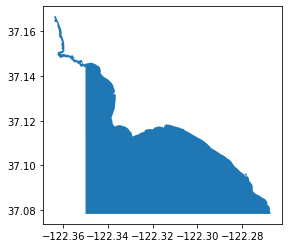

In [2]:
file = "../Data/MPA Shapefiles/mpa_ca/mpa_caPolygon.shp"
mpa_shapes_epsg = gpd.GeoDataFrame.from_file(file)
mpa_shapes_WGS84 = mpa_shapes_epsg.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
mpa_shape = mpa_shapes_WGS84[mpa_shapes_WGS84['name']=="Año Nuevo SMCA"]
mpa_shape.plot()

__Download the California elevation dataset__

These datasets are regionally specific, so a mapping needs to be made for automating to the MPAs to the regional dataset. 

The data are access through the opendap services on NGDC (Now NCEI) THREDDS server (TDS). They will be lazy loaded and subsetted for the MPA and saved in the data directory.

In [12]:
url = "https://www.ngdc.noaa.gov/thredds/dodsC/regional/monterey_13_mhw_2012.nc"
bathy = xr.open_dataset(url)

In [13]:
bounds = mpa_shape['geometry'].bounds
maxx = round(bounds['maxx'].values[0],4)
minx = round(bounds['minx'].values[0],4)
maxy = round(bounds['maxy'].values[0],4)
miny = round(bounds['miny'].values[0],4)
print(maxx,minx)
print(maxy,miny)

-122.267 -122.3642
37.1667 37.0783


In [14]:
ano_bathy = bathy.sel(lat=slice(miny-.25, maxy+.25),lon=slice(maxx-.25, minx+.25)).load()
ano_bathy.to_netcdf('../Data/MPA Bathy Subsets/ano_nuevo_SMR_bathy.nc')

/Users/patrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


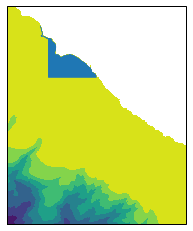

In [11]:
bathy = xr.open_dataset('../Data/MPA Bathy Subsets/ano_nuevo_SMR_bathy.nc')
y = bathy['lat'].values
x = bathy['lon'].values
xx,yy = np.meshgrid(x, y)
elv = bathy['Band1'].values
elv[elv>0] = np.nan


fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.contourf(xx,yy,elv)
mpa_shape.plot(ax=ax)
mpa_shape.plot(ax=ax)